In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np

In [ ]:
#Load data, the returnX_y argument is set to True to return data and labels
(x, y) = load_iris(return_X_y=True)

#Virginica

In [ ]:
#Wybrany kwiat Virginica
y_splt = y!=2
y[y_splt] = 0
y[~y_splt] = 1

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,
                                                    test_size=0.2)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.losses import BinaryCrossentropy

In [ ]:
model = Sequential([
    Dense(16, input_dim=4, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-1), loss=BinaryCrossentropy(),
             metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=4, batch_size=8, verbose=1)

Epoch 1/4
15/15 [==============================] - 1s 2ms/step - loss: 0.8670 - accuracy: 0.6917
Epoch 2/4
15/15 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8083
Epoch 3/4
15/15 [==============================] - 0s 3ms/step - loss: 0.2552 - accuracy: 0.8750
Epoch 4/4
15/15 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9167


In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 197ms/step - loss: 0.2432 - accuracy: 0.9000


[0.24322152137756348, 0.8999999761581421]

In [ ]:
from matplotlib import pyplot as plt

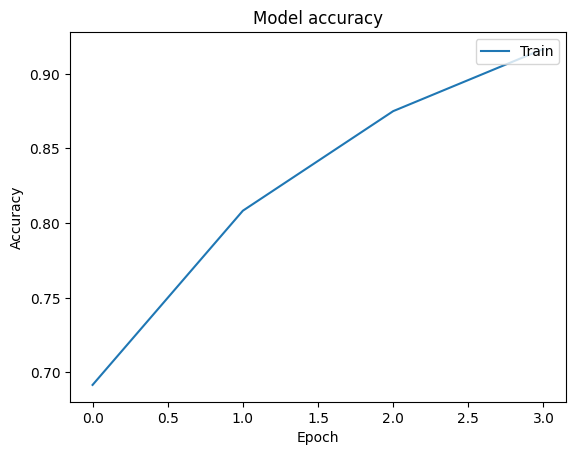

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

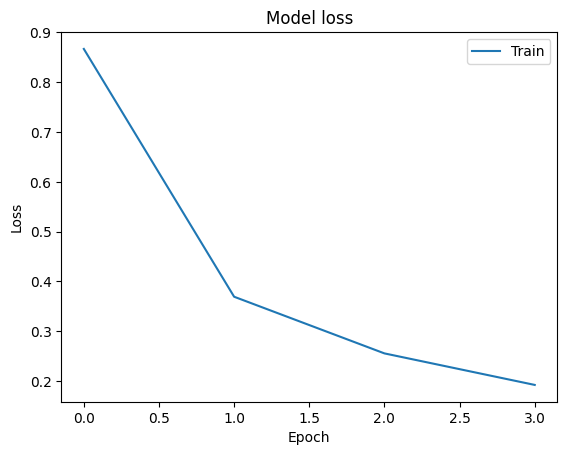

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
# Przewidywanie wyników
y_pred = model.predict(x_train)
# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]
# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded)
recall = recall_score(y_train, y_pred_rounded)
# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(y_train, y_pred_rounded)

4/4 [==============================] - 0s 4ms/step


In [ ]:
# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8833333333333333
Precision: 0.7407407407407407
Recall: 0.7407407407407407
Confusion Matrix:
 [[66 14]
 [ 0 40]]


In [ ]:
y_result_train = model.predict(x_train)
y_result_train = np.round(y_result_train)
bledy = 0
for i in range(len(y_train)):
 if y_result_train[i] != y_train[i]:
  bledy += 1
print("Liczba bledow ciagu treningowego: ", bledy)

4/4 [==============================] - 0s 3ms/step
Liczba bledow ciagu treningowego:  14


#Setosa

In [ ]:
#Load data, the returnX_y argument is set to True to return data and labels
(x, y) = load_iris(return_X_y=True)

#Wybrany kwiat Setosa
y_splt = y!=0
y[y_splt] = 0
y[~y_splt] = 1

In [ ]:
print(y_train)

[0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 1 1 0]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,
                                                    test_size=0.2)

In [ ]:
#Najmniejszy model potrafiacy rozwiazac zadanie,
#jednak nie zawsze jest w stanie sie nauczyc.
model = Sequential([
    Dense(4, input_dim=4, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer = Adam(learning_rate=1e-2),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=4 ,batch_size=4, verbose=1)

Epoch 1/4
30/30 [==============================] - 1s 2ms/step - loss: 0.5436 - accuracy: 0.6667
Epoch 2/4
30/30 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.6667
Epoch 3/4
30/30 [==============================] - 0s 2ms/step - loss: 0.3119 - accuracy: 0.8667
Epoch 4/4
30/30 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9917


In [ ]:
model.evaluate(x_test, y_test, batch_size=4)

8/8 [==============================] - 0s 3ms/step - loss: 0.1912 - accuracy: 1.0000


[0.1912446767091751, 1.0]

In [ ]:
# Przewidywanie wyników
y_pred = model.predict(x_train)
# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]
# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded)
recall = recall_score(y_train, y_pred_rounded)
# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(y_train, y_pred_rounded)

4/4 [==============================] - 0s 3ms/step


In [ ]:
# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[80  0]
 [ 0 40]]


In [ ]:
y_result_train = model.predict(x_train)
y_result_train = np.round(y_result_train)
bledy = 0
for i in range(len(y_train)):
 if y_result_train[i] != y_train[i]:
  bledy += 1
print("Liczba bledow ciagu treningowego: ", bledy)

4/4 [==============================] - 0s 3ms/step
Liczba bledow ciagu treningowego:  0
